# Customizing Ticks

## Major and Minor Ticks

Within each axis, there is the concept of a majortick mark, and a minortick mark. As the name would imply, major ticks are usually bigger or more pronounced, while minor ticks are usually smaller. By default, Matplotlib rarely makes use of minor ticks, but one place you can see them is within log plots:

In [6]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

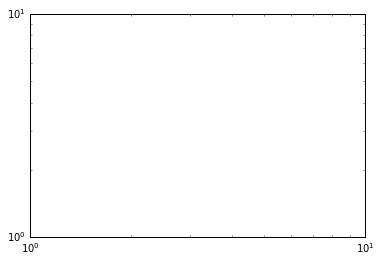

In [7]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

In [8]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [9]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

# Hiding Ticks

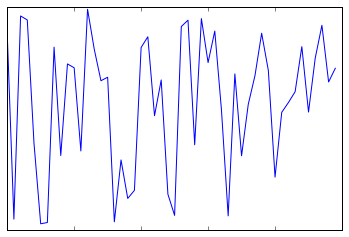

In [10]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

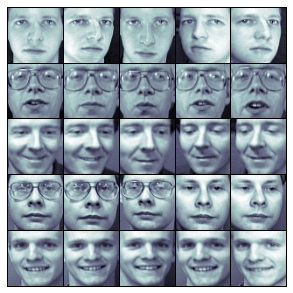

In [17]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

# Reducing or Increasing the Number of Ticks

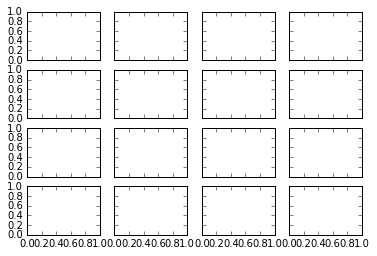

In [18]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

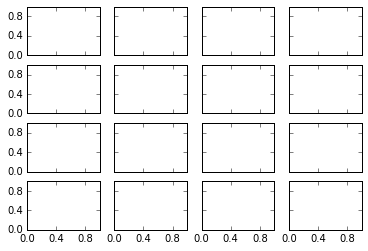

In [19]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

# Fancy Tick Formats

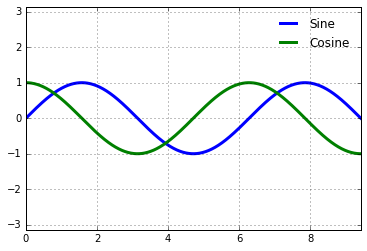

In [23]:
# Plot a  sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

There are a couple changes we might like to make. First, it's more natural for this data to space the ticks and grid lines in multiples of π. We can do this by setting a MultipleLocator, which locates ticks at a multiple of the number you provide. For good measure, we'll add both major and minor ticks in multiples of π/4:

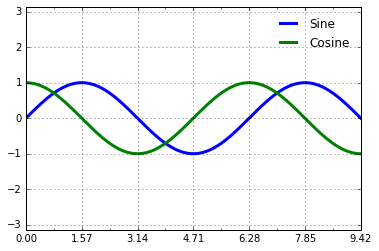

In [24]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

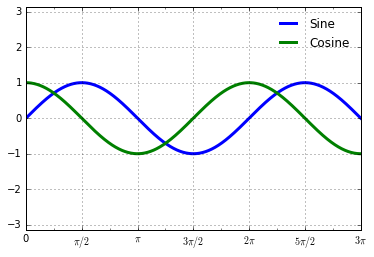

In [25]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig